In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from costs import *

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Data preprocessing

In [3]:
import pandas as pd
tX_pd = pd.DataFrame(tX)
tX_pd.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,2.237,282.849,3.0,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,-1.443,294.074,2.0,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,...,-1.761,187.299,1.0,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,...,0.024,129.804,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,...,0.845,294.741,1.0,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [4]:
drops = [5,6,12,24,25,26,27,28]

In [5]:
tX_pd.drop(drops, inplace=True, axis=1)

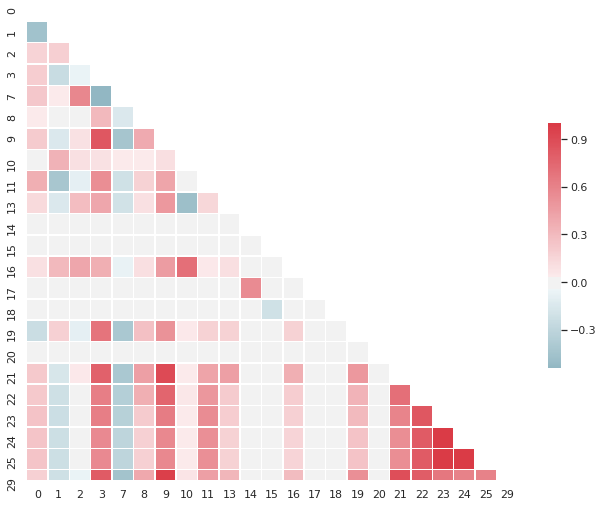

In [71]:

sns.set(style="white")

d = tX_pd
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

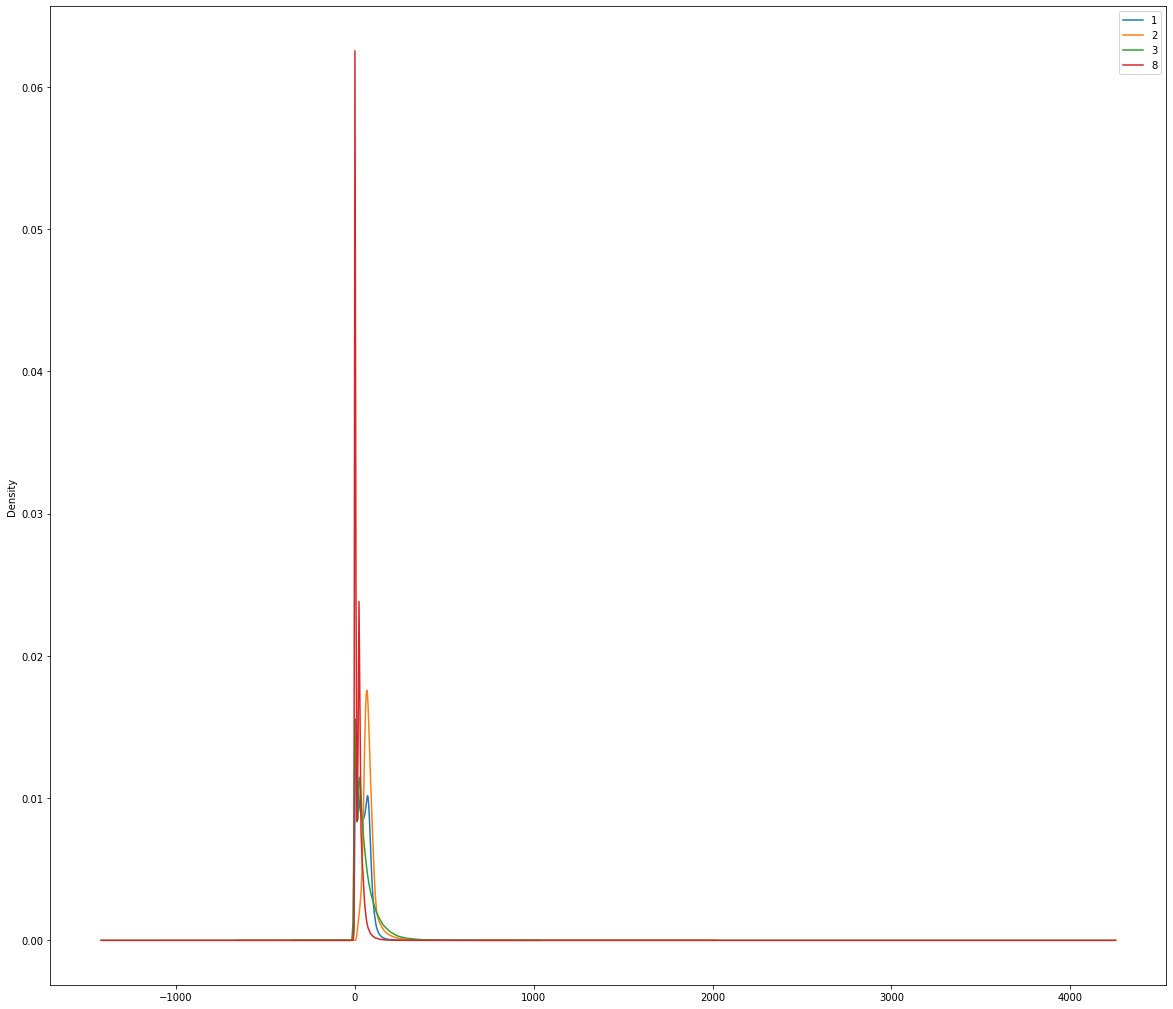

In [6]:
tX_pd[[1,2,3,8]].plot.density(figsize=(20,18))

In [43]:
print(np.sum(corr.round(2)[9]),np.sum(corr.round(2)[29]))

13.09 12.940000000000001


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 1440x1296 with 0 Axes>

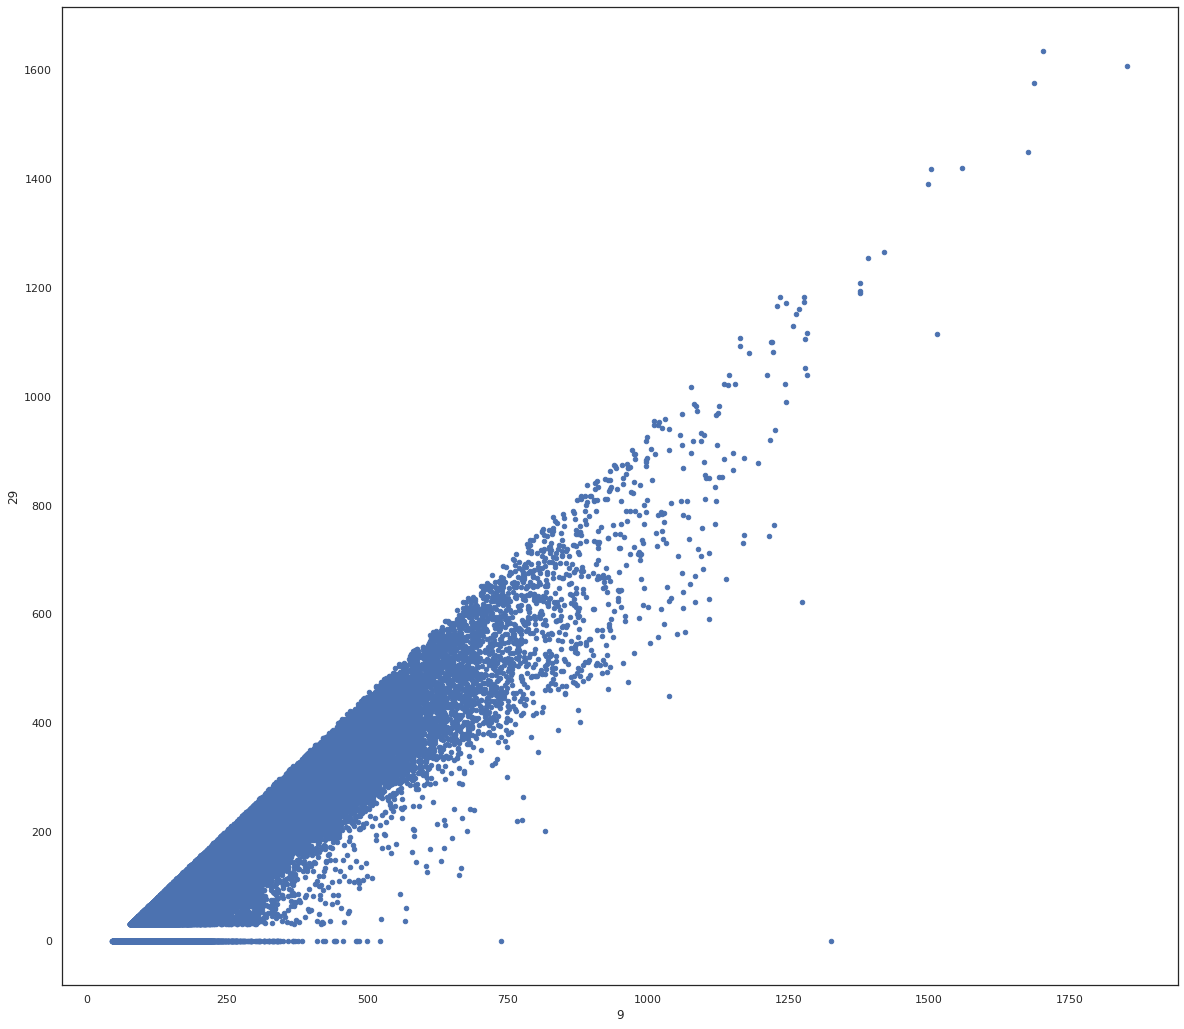

In [34]:
plt.figure(figsize=(20,18))
tX_pd.plot.scatter(9,29, figsize=(20,18))

In [44]:
for i in range(0,30):
    s = tX_pd[tX_pd[i]==-999].index.size
    if s > 150000:
        print(i, s)
        tX_pd.drop(i, axis=1, inplace=True)

4 177457
5 177457
6 177457
12 177457
26 177457
27 177457
28 177457


In [45]:
tX_pd.columns.size

23

In [46]:
tX_clean = tX_pd.values
tX_clean.shape

(250000, 23)

In [47]:
tX = tX_clean

In [48]:
#normalize data
from helpers import *
tX, mean_x, std_x = standardize(tX)

In [49]:
tX.shape

(250000, 23)

In [50]:
tX

array([[ 0.61210652,  0.27263912,  0.45318267, ...,  0.07906273,
         0.07239186,  0.51445612],
       [ 0.69995786,  0.33955504,  0.47432925, ...,  0.07349064,
         0.07518377,  0.25141043],
       [-3.83567311,  0.70478701,  0.56316206, ...,  0.07868344,
         0.06272575,  0.24368771],
       ...,
       [ 0.4830178 ,  0.30732685,  0.36720434, ...,  0.07769415,
         0.07000662,  0.23485448],
       [ 0.44193683,  0.14636577,  0.33972709, ..., -3.83567311,
        -3.83567311,  0.07065572],
       [-3.83567311,  0.35514907,  0.34762186, ..., -3.83567311,
        -3.83567311,  0.07065572]])

In [51]:
#polynomial basis
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    for d in range (0, degree+1):
        if d==0:
            psi=np.power(x,d)
        else:
            psi = np.hstack((psi, np.power(x,d)))
    return psi


In [53]:
xpoly = build_poly(tX,7)
xpoly.shape

(250000, 184)

In [54]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [55]:
from costs import *
def compute_rmse(y, x, w):
    l = compute_loss(y, x, w)
    return np.math.sqrt(2*l)

In [56]:
import matplotlib.pyplot as plt

def cross_validation(y, x, k_indices, k, lambda_, degree, mean=True):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    for k_group in range(k):
        index_te = k_indices[k_group]
        index_tr = np.setdiff1d(np.arange(len(y)), index_te)
        x_te = x[index_te]
        x_tr = x[index_tr]
        y_te = y[index_te]
        y_tr = y[index_tr]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
        x_te_poly = build_poly(x_te, degree)
        x_tr_poly = build_poly(x_tr, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
        w = ridge_regression(y_tr, x_tr_poly, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
        rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
        rmse_te = compute_rmse(y_te, x_te_poly, w)
        losses_tr.append(rmse_tr)
        losses_te.append(rmse_te)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    if mean==True:
        loss_tr = np.mean(losses_tr)
        loss_te = np.mean(losses_te)
    else:
        loss_tr = losses_tr
        loss_te = losses_te
    return loss_tr, loss_te

In [57]:
from plots_lab4 import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 3
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    #lambdas =[0.1, 0.01, 1]
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, tX, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

NameError: name 'ridge_regression' is not defined

In [58]:
from helpers import *

In [59]:
def compute_loss(y, tx, w):
    e = y - np.dot(tx,w)
    N = len(y)
    L=e.T.dot(e)/(2*N)
    return L

In [60]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e=y-tx.dot(w)
    N=len(y)
    return -(np.transpose(tx).dot(e))/N

In [61]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        new_w = w - gamma*g;
        new_loss = compute_loss(y, tx, new_w)
        # print TO DELETE IN FINAL VERSION
        if new_loss <= loss:
            loss, w = new_loss, new_w
            gamma *=1.8 #accelerate algorithm learning rate
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3 #decelerate to avoid exponential growing
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [62]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.0001

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
gradient_w, gradient_loss = gradient_descent(y, tX, w_initial, max_iters, gamma)

Gradient Descent(0/199): ||gradient||=1.3806362044517237, loss=0.49980954921762955, w0=3.987689246236717e-05, w1=-1.2892054974017063e-05
Gradient Descent(1/199): ||gradient||=1.3782482609281335, loss=0.4994681591153545, w0=0.00011159950766115943, w1=-3.6077239650049636e-05
Gradient Descent(2/199): ||gradient||=1.3739582070354468, loss=0.49885823757962516, w0=0.00024051972695684495, w1=-7.774422083393094e-05
Gradient Descent(3/199): ||gradient||=1.3662627789697979, loss=0.49777507885452743, w0=0.00047199294443025955, w1=-0.00015253047858335123
Gradient Descent(4/199): ||gradient||=1.3524971652843432, loss=0.49587220722941844, w0=0.0008867645665557507, w1=-0.0002864552758464355
Gradient Descent(5/199): ||gradient||=1.3279967548395086, loss=0.4925940696327378, w0=0.0016273158082551664, w1=-0.0005253053667126485
Gradient Descent(6/199): ||gradient||=1.2847873413949542, loss=0.4871437404269158, w0=0.002941058040296109, w1=-0.0009481906344710306
Gradient Descent(7/199): ||gradient||=1.209850

In [65]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e=y-tx.dot(w)
    N=len(y)
    return -(np.transpose(tx).dot(e))/N

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient(yn, xn, w)
            new_w = w - gamma*g;
            new_loss = compute_loss(y, tx, new_w)
        if new_loss <= loss:
            loss , w = new_loss , new_w
            gamma *=1.8
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             #     bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [66]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
sgd_loss, sgd_w = stochastic_gradient_descent(
    y, tX, w_initial, batch_size, max_iters, gamma)


SGD(0/99): |gradient|=2.321887720293888, loss=0.5007038019214434, w0=0.005978576090665615, w1=0.001669609948387445
SGD(1/99): |gradient|=6.763563632638207, loss=0.5007038019214434, w0=0.005978576090665615, w1=0.001669609948387445
SGD(2/99): |gradient|=6.766168804081491, loss=0.5007038019214434, w0=0.005978576090665615, w1=0.001669609948387445
SGD(3/99): |gradient|=6.663633661239792, loss=0.48831902186553283, w0=0.005182186554156631, w1=0.0013291757832344156
SGD(4/99): |gradient|=6.290292934465582, loss=0.47183497519335327, w0=0.003673413531123381, w1=0.00032639380301711495
SGD(5/99): |gradient|=3.0743017281374367, loss=0.47183497519335327, w0=0.003673413531123381, w1=0.00032639380301711495
SGD(6/99): |gradient|=3.1184504920493032, loss=0.47183497519335327, w0=0.003673413531123381, w1=0.00032639380301711495
SGD(7/99): |gradient|=1.1284189610146602, loss=0.4718233133977638, w0=0.0034721324742868777, w1=0.0002732027839211068
SGD(8/99): |gradient|=8.066196450830523, loss=0.4718233133977638

In [67]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.lstsq(G,tx.T.dot(y), rcond=None) [0]
    return w

In [68]:
w_ls = least_squares(y, tX)
loss = compute_loss(y, tX, w)
loss

NameError: name 'w' is not defined

In [ ]:
# w_star = least_squares(y,xpoly)
w0 = least_squares(y,xpoly[:,:,0])
w1 = least_squares(y,xpoly[:,:,1])
w2 = least_squares(y,xpoly[:,:,2])

In [ ]:
w = [w0, w1, w2]
yp = np.zeros((250000,3))
yp[:,0] = xpoly[:,:,0].dot(w0)
yp[:,1] = xpoly[:,:,1].dot(w1)
yp[:,2] = xpoly[:,:,2].dot(w2)
compute_loss(yp, xpoly, w)

In [16]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = len(y)
    G = tx.T.dot(tx)
    i = np.linalg.inv(G + 2*N*lambda_*np.eye(G.shape[0]))
    w_star = i.dot(tx.T).dot(y)
    return w_star

In [76]:
xpoly = build_poly(tX,7)

In [77]:
lambda_ = 0.2
w = ridge_regression(y, xpoly, lambda_)
loss = compute_loss(y, xpoly, w)
print(loss)

0.40817865583886614


## Generate predictions and save ouput in csv format for submission:

In [245]:
weights = w
weights

array([ 2.24104142e-04, -8.68280397e-03, -2.68859353e-03, -2.22470926e-03,
       -5.48363092e-03,  5.00183793e-04, -1.72285231e-02,  6.05199540e-02,
        1.57457370e-05,  3.49522005e-03, -5.39186900e-02,  6.84999623e-02,
        2.19603319e-02,  5.70895097e-03, -4.23536533e-04, -1.28871636e-03,
        3.30152909e-03, -5.20781620e-04,  9.12327144e-04,  4.86026909e-03,
        4.62605701e-04, -7.55206472e-04, -5.59287480e-02,  1.20180623e-03,
       -6.34079801e-04, -4.00651108e-04,  5.73198500e-05,  1.25042999e-03,
       -8.49579237e-04, -5.51323579e-03])

In [227]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [246]:
OUTPUT_PATH = '../data/submission.csv'
tX_test_s, mean_tes, std_test = standardize(tX_test)
y_pred = predict_labels(weights, tX_test_s)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [247]:
loss = compute_loss(y_pred, tX_test_s, w)
loss

0.4940938727534078

array([[-2.96637287, -1.59557484],
       [-0.96443888,  2.30659937],
       [-2.7925803 , -1.26619016],
       ...,
       [-2.78555006, -1.2651345 ],
       [-0.97573941,  2.28919741],
       [-2.80136474, -1.27570913]])

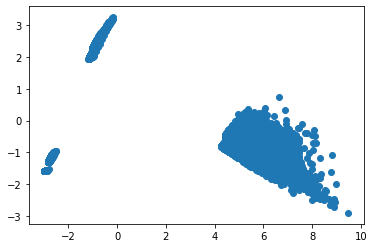

In [263]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tX_test_s)
plt.scatter(principalComponents[:,0], principalComponents[:,1])